# Principal Component Analysis

PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. In other words, PCA will conduct feature elimination feature extraction to linearly compress a dataset to a lower dimensionality. 

### When To Use
* Want to reduce variables
* Ensure variable independence
* Will change independent variables, changing how the data is visualized. This may or may not be a good thing
* This algorithm can be useful when a dataset is very large and complex. In exchange for lost data, the algorithm that will used the compressed data to compute faster
<br>

### How Does it Work
* It takes the variables and creates a matrix
* The algorithm then computes the covariancee --relationship-- between the data in the matrix
* This process is repeated according to the number of principal components 
<br>

### Results 
* The algorithm will compress the higer dimension data and breaks it down to principal components
* Along these principal components, similiar data points will start to cluster. While this is not indiciative or original dataset distribution, it reveals the closeness and relationship between other clusters
* NOTE: principal compenants are split along importness. Componet 1 is more significant that component 2, and etc...
<br>


### Limitations
* The algorthim is not scale invariant. Thus, the data needs to be scaled before the algorithm is compressed
* It maximizes variance between variables
* If the variables are correlated, then PCA will be effective in compressing the data. Otherwise, PCA orders them according to their variances
* PCA utilizes mean and variance matricies. If the data does not follow this distribution, mixed results will arise


## IRIS Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# loading dataset into Pandas DataFrame
df = pd.read_csv(url
                 , names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#We have labeled data. So let us remove the target and keep only the features
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
x[0:5] #It is now a numpy array that houses all the data from the dataframe

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
y = df.loc[:,['target']].values # Let us keep the labels as well

In [10]:
#Scaling the data with a mean of 0 and a variance of 1
x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [13]:
# 2D Components
pca = PCA(n_components=2) #Define dimensionality
principalComponents = pca.fit_transform(x) #Train the data

In [16]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) 
#This shows we have two different dimensionality. Notice how the data isn't clear

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [17]:
#Since we know the original labels, we could see how the data has changed
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


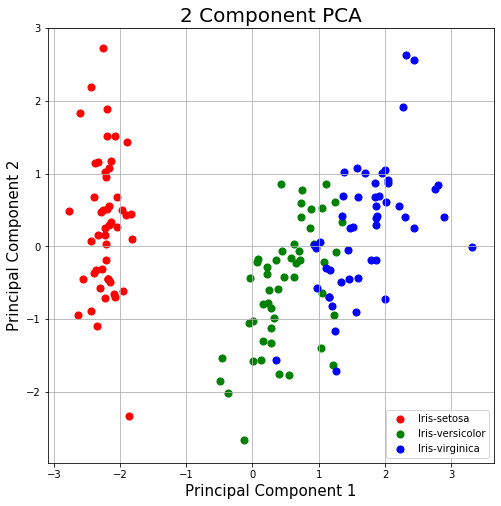

In [18]:
#Graph Visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
# We can see how much variance that belongs to each principal component
# 73 % belong to component 1 and 23 % belongs to component 2
# This leads to a 4% loss in variance in the data set
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

## MINST Dataset

Classes: 10  <br/>
Samples: 7000 per class <br/>
Sample Total: 70000 <br/>
Dimensionality: 784 pixels = 28 x 28 x 1 <br/>
Features: Greyscale 0-255 integer values <br/>


In [71]:
import numpy as np
import time
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [57]:
mnist = fetch_openml('mnist_784')

In [58]:
X = mnist.data / 255.0
y = mnist.target
print("Shape", X.shape)
print("Target", y.shape)

Shape (70000, 784)
Target (70000,)


In [59]:
#Create a Dataframe for easy use
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (70000, 786)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,9


In [60]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

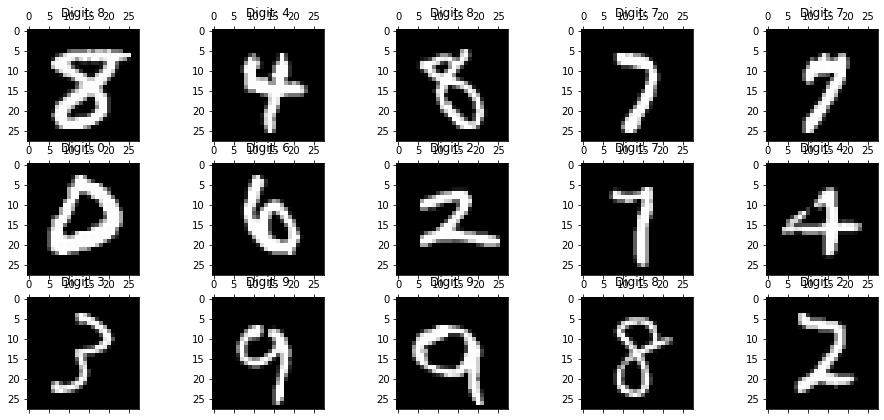

In [61]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [66]:
#PCA component Crunching
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)

In [67]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
print("Component Break Down")
print(format(pca.explained_variance_ratio_))
print("Variance Lost: ", 1-sum(pca.explained_variance_ratio_))

Component Break Down
[0.09746116 0.07155445]
Variance Lost:  0.8309843949153852


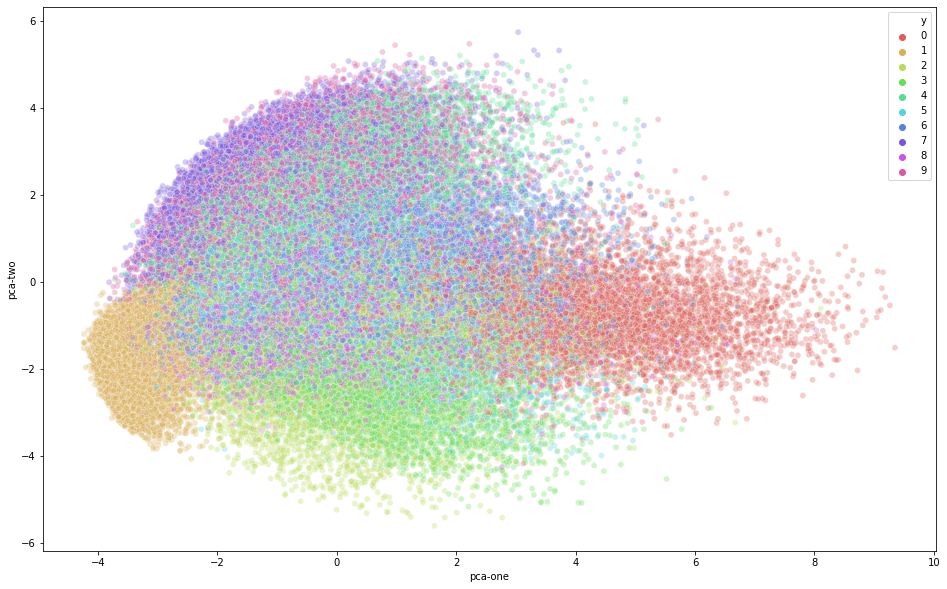

In [68]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)